In [10]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch
import configs

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

# Reconstruction Training

In [3]:
def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [4]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn/'

In [5]:
tensorboard_dir = f'{engram_dir}1_tensorboard/'

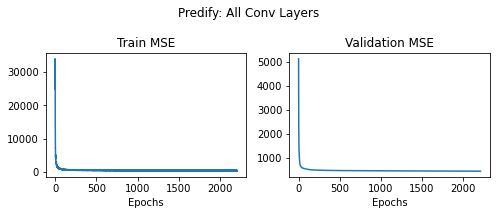

In [6]:
tfdir = tensorboard_dir + 'pnet/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=15)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), smoothed_train)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

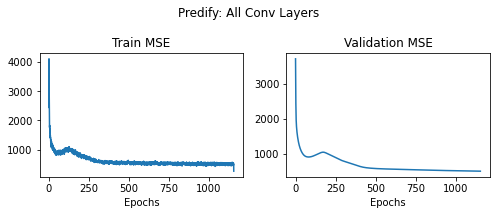

In [9]:
tfdir = tensorboard_dir + 'pnet3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=15)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), smoothed_train)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

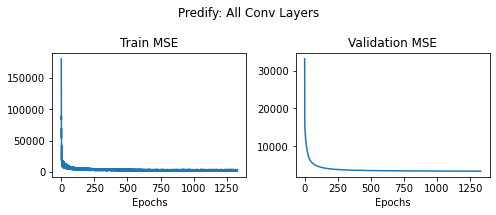

In [7]:
tfdir = tensorboard_dir + 'pnet_temp_shuffle2/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

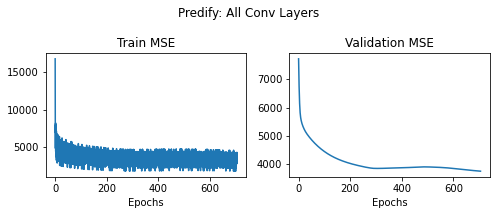

In [8]:
tfdir = tensorboard_dir + 'pnet_temp_shuffle3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

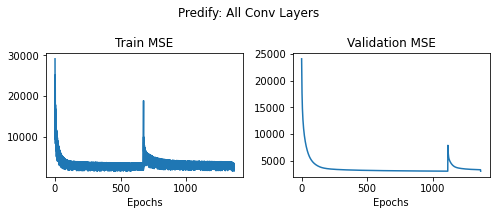

In [10]:
tfdir = tensorboard_dir + 'pnet_freq_shuffle2/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

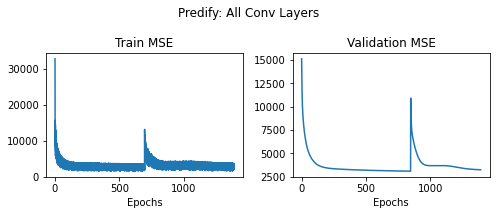

In [11]:
tfdir = tensorboard_dir + 'pnet_freq_shuffle3/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Eval/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

In [ ]:
tfdir = tensorboard_dir + 'pnet_rnn_0/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    losses = [e.value for e in ea.Scalars('TrainingLoss/CE')]
    train_loss.extend(losses)
    for epoch in range(len(losses)):
        eval_loss.append(0)
        #eval_loss.append(ea.Scalars(f'EvalPerf/Epoch#{epoch}')[0].value)
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))
train_loss = smooth(len(train_loss), train_loss, 50)
axs[0].plot(np.linspace(0, len(eval_loss), len(train_loss)), train_loss)
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(3000, 3500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

# Hyperparameter Training

In [7]:
plot_ci = True

In [8]:
tensorboard_dir = f'{engram_dir}2_hyperp/pnet/'

hyper_Babble8Spkr_snr-6.0
events.out.tfevents.1680990868.ax14.rc.zi.columbia.edu.48958.2
0.15008629858493805
115
events.out.tfevents.1693323992.ax04.rc.zi.columbia.edu.8947.35
0.8074617385864258
201
events.out.tfevents.1680948927.ax14.rc.zi.columbia.edu.48958.1
0.821745753288269
201
events.out.tfevents.1680906981.ax14.rc.zi.columbia.edu.48958.0
0.5427595376968384
201
events.out.tfevents.1680813977.ax08.rc.zi.columbia.edu.46308.0
0.2308349609375
145
converted_GjuEsq4hYP5SHpHTApBuNU.p


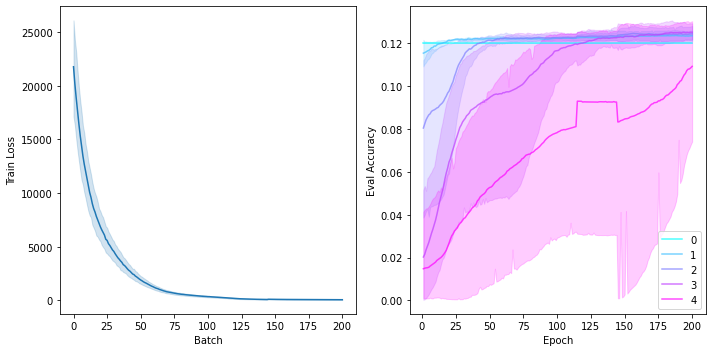




hyper_pinkNoise_snr3.0
events.out.tfevents.1680909612.ax14.rc.zi.columbia.edu.11669.1
0.338285356760025
201
events.out.tfevents.1680810614.ax10.rc.zi.columbia.edu.295874.0
0.7792268991470337
48
events.out.tfevents.1680951528.ax14.rc.zi.columbia.edu.11669.2
0.5610174536705017
201
events.out.tfevents.1680993466.ax14.rc.zi.columbia.edu.11669.3
0.379385769367218
103
events.out.tfevents.1680867720.ax14.rc.zi.columbia.edu.11669.0
0.06273521482944489
201


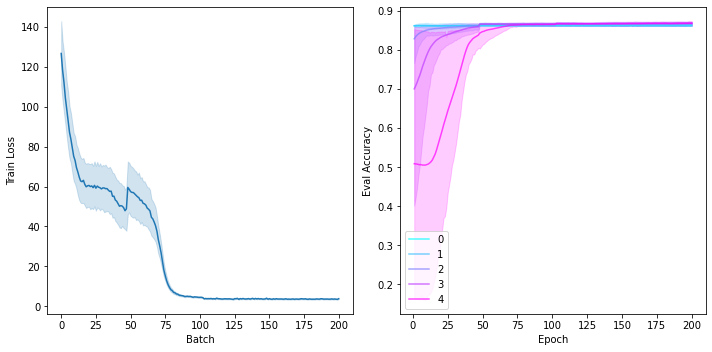




hyper_pinkNoise_snr-6.0
events.out.tfevents.1680993277.ax16.rc.zi.columbia.edu.12917.3
0.19775183498859406
104
events.out.tfevents.1680810614.ax10.rc.zi.columbia.edu.295875.0
0.9754155278205872
48
events.out.tfevents.1680909594.ax16.rc.zi.columbia.edu.12917.1
0.05653173103928566
201
events.out.tfevents.1680951428.ax16.rc.zi.columbia.edu.12917.2
0.19411054253578186
201
events.out.tfevents.1680867758.ax16.rc.zi.columbia.edu.12917.0
0.21776486933231354
201


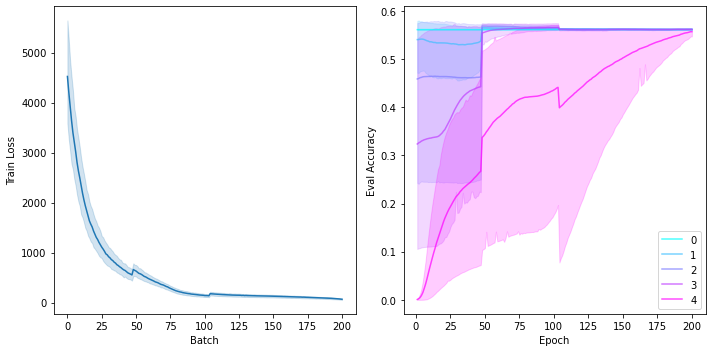




hyper_AudScene_snr-3.0
converted_mhcWjX39sswMPFMAN2rRZW.p
events.out.tfevents.1693324051.ax04.rc.zi.columbia.edu.8947.36
0.2566021978855133
201
events.out.tfevents.1680810560.ax05.rc.zi.columbia.edu.51441.0
0.8377516865730286
201
events.out.tfevents.1680914935.ax05.rc.zi.columbia.edu.51441.1
0.6135774850845337
192


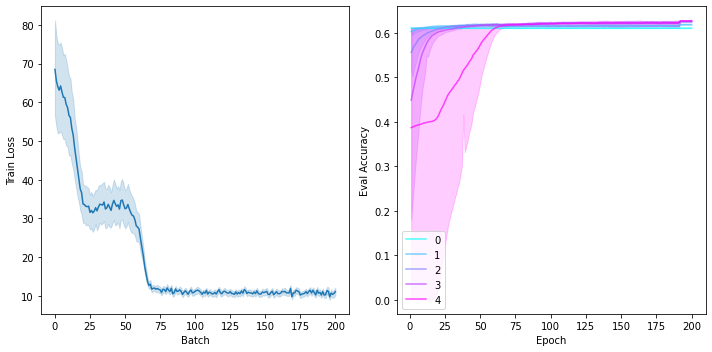




hyper_AudScene_snr0.0
events.out.tfevents.1693324103.ax04.rc.zi.columbia.edu.8947.37
0.5734864473342896
201
events.out.tfevents.1680914935.ax05.rc.zi.columbia.edu.51442.1
0.6946598887443542
192
events.out.tfevents.1680810560.ax05.rc.zi.columbia.edu.51442.0
0.3340465724468231
201
converted_jMBuZLne9aFcqyRJLCyucN.p


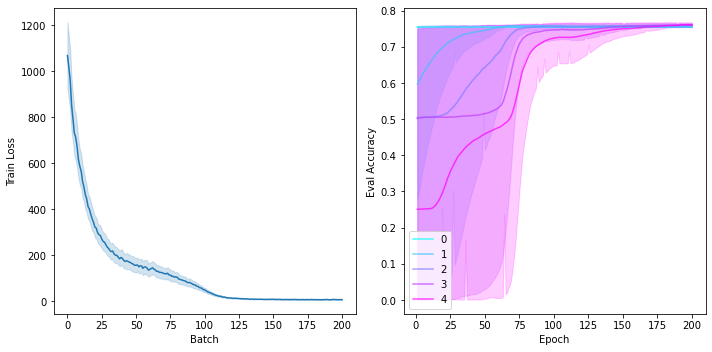




hyper_pinkNoise_snr-9.0
events.out.tfevents.1680810623.ax11.rc.zi.columbia.edu.34545.0
0.05679786950349808
201
events.out.tfevents.1680894241.ax11.rc.zi.columbia.edu.34545.2
0.02991202101111412
201
events.out.tfevents.1680852449.ax11.rc.zi.columbia.edu.34545.1
0.7487216591835022
201
events.out.tfevents.1680936018.ax11.rc.zi.columbia.edu.34545.3
0.20719286799430847
201


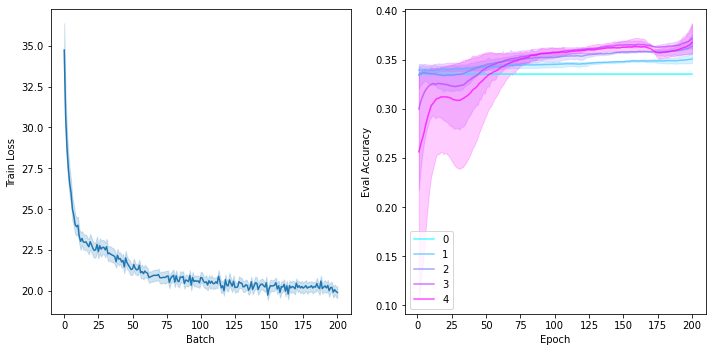




hyper_pinkNoise_snr0.0
converted_QYKr93V43kusr9gF2XHKMQ.p
events.out.tfevents.1680978006.ax14.rc.zi.columbia.edu.47540.2
0.4981808066368103
177
events.out.tfevents.1693324157.ax04.rc.zi.columbia.edu.8947.38
0.2267783284187317
201
events.out.tfevents.1680894174.ax14.rc.zi.columbia.edu.47540.0
0.7852727770805359
201
events.out.tfevents.1680936063.ax14.rc.zi.columbia.edu.47540.1
0.09715146571397781
201


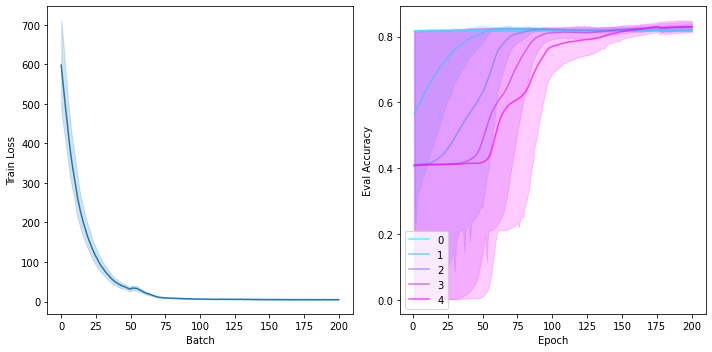




hyper_AudScene_snr-6.0
events.out.tfevents.1680916265.ax05.rc.zi.columbia.edu.51440.1
0.5215696692466736
187
events.out.tfevents.1680810560.ax05.rc.zi.columbia.edu.51440.0
0.5473127365112305
201
events.out.tfevents.1693324211.ax04.rc.zi.columbia.edu.8947.39
0.035155314952135086
201
converted_YT6UoZS8mP9jDFAoX6NJFd.p


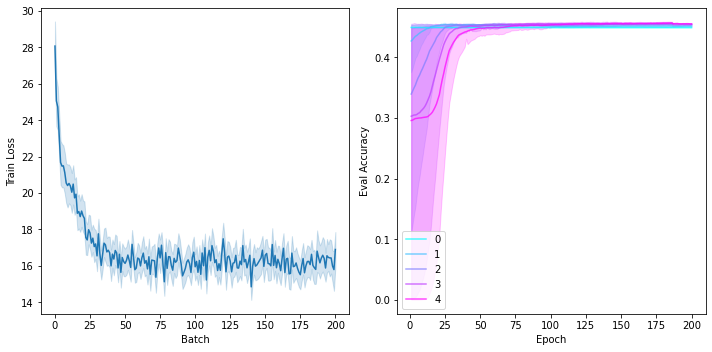




hyper_Babble8Spkr_snr-3.0
converted_hBDMG4rev23Rb8kq3fb86F.p
events.out.tfevents.1693324331.ax04.rc.zi.columbia.edu.8947.41
0.6532494425773621
201
events.out.tfevents.1693324269.ax04.rc.zi.columbia.edu.8947.40
0.7701732516288757
201
converted_mRhyYZJSbkrdKNi2vqXrgP.p
events.out.tfevents.1693324401.ax04.rc.zi.columbia.edu.8947.42
0.39138951897621155
201
events.out.tfevents.1680810562.ax08.rc.zi.columbia.edu.151272.0
0.3286001682281494
151
events.out.tfevents.1680894051.ax08.rc.zi.columbia.edu.101687.0
0.06393945962190628
172
events.out.tfevents.1680984017.ax16.rc.zi.columbia.edu.54959.0
0.1930995136499405
148
converted_TtZe6DKYYi2nG8EzvuNwow.p


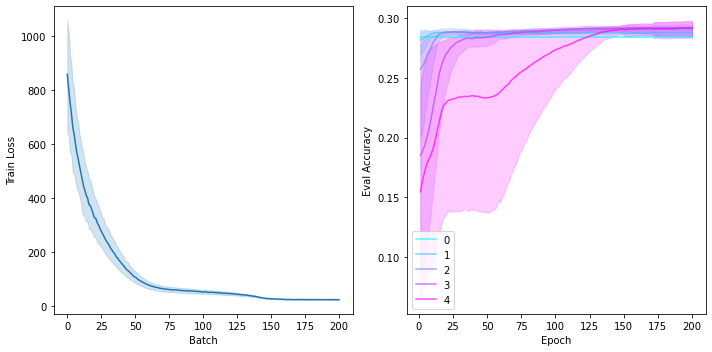




hyper_AudScene_snr3.0
converted_KVSYxGu2Pj4wZGuzRc2zNv.p
events.out.tfevents.1693324467.ax04.rc.zi.columbia.edu.8947.43
0.29249924421310425
201
converted_N8kvXenDPj9qzMgEf4Ufbm.p
events.out.tfevents.1693324524.ax04.rc.zi.columbia.edu.8947.44
0.6135461330413818
201
events.out.tfevents.1680932804.ax03.rc.zi.columbia.edu.50795.1
0.12196505814790726
159
events.out.tfevents.1680829116.ax03.rc.zi.columbia.edu.50795.0
0.866249144077301
201


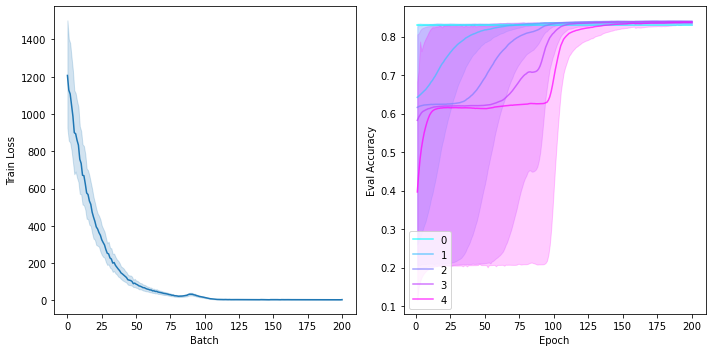




hyper_AudScene_snr-9.0
events.out.tfevents.1680810563.ax04.rc.zi.columbia.edu.15624.0
0.452202171087265
201
converted_SVGzMM4Zxh2FABcxsusEUe.p
events.out.tfevents.1680914520.ax04.rc.zi.columbia.edu.15624.1
0.6043509840965271
194
events.out.tfevents.1693324577.ax04.rc.zi.columbia.edu.8947.45
0.025462085381150246
201


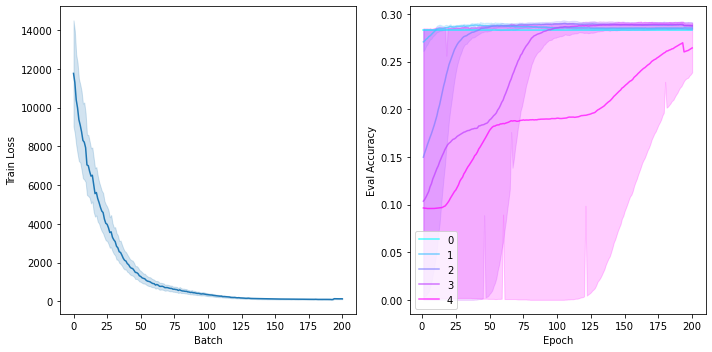




hyper_Babble8Spkr_snr3.0
events.out.tfevents.1680810562.ax08.rc.zi.columbia.edu.151271.0
0.4410012364387512
201
events.out.tfevents.1680915181.ax08.rc.zi.columbia.edu.151271.1
0.6520820260047913
191
events.out.tfevents.1693324628.ax04.rc.zi.columbia.edu.8947.46
0.640294075012207
201
converted_BY6RbccJNpoWuy75PjVwqr.p


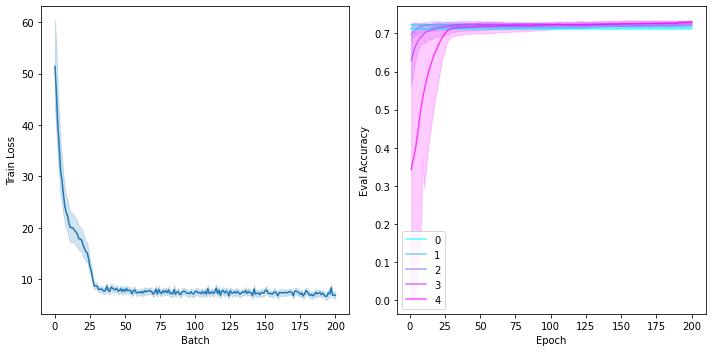




hyper_Babble8Spkr_snr-9.0
events.out.tfevents.1680810966.ax13.rc.zi.columbia.edu.21371.0
0.17565032839775085
201
events.out.tfevents.1680852740.ax13.rc.zi.columbia.edu.21371.1
0.3260047733783722
201
events.out.tfevents.1680894512.ax13.rc.zi.columbia.edu.21371.2
0.6195152401924133
201
events.out.tfevents.1680936352.ax13.rc.zi.columbia.edu.21371.3
0.5094247460365295
201


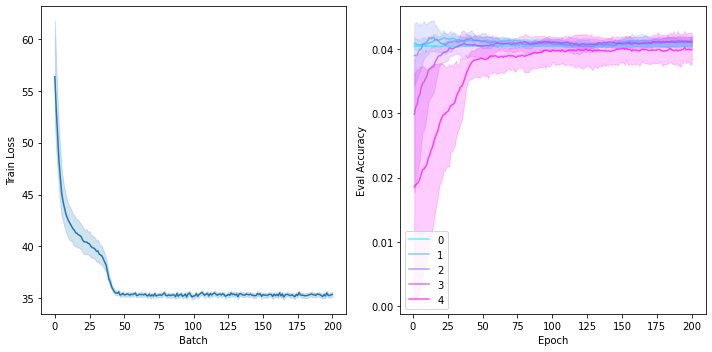




hyper_Babble8Spkr_snr0.0
events.out.tfevents.1693324738.ax04.rc.zi.columbia.edu.8947.48
0.3904455900192261
201
events.out.tfevents.1680916207.ax08.rc.zi.columbia.edu.151276.1
0.45031529664993286
128
converted_EtVAJUjZEfdDUbwtriGEKk.p
events.out.tfevents.1680810562.ax08.rc.zi.columbia.edu.151276.0
0.7182804346084595
201
events.out.tfevents.1680984017.ax16.rc.zi.columbia.edu.54958.0
0.7706519961357117
148
events.out.tfevents.1693324678.ax04.rc.zi.columbia.edu.8947.47
0.5987371802330017
201
converted_UQ3hxCDEihKVgqV9SmoBwm.p


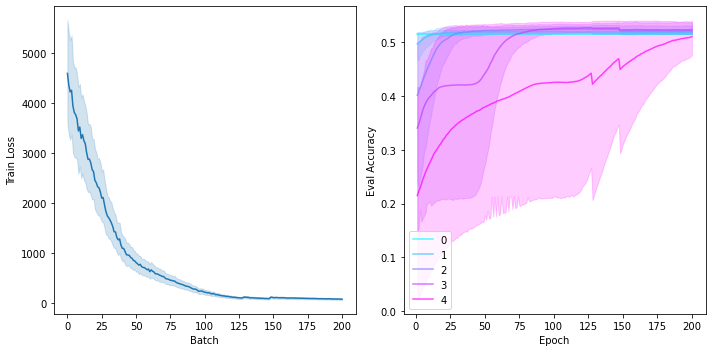




hyper_pinkNoise_snr-3.0
events.out.tfevents.1680933586.ax03.rc.zi.columbia.edu.3243.1
0.1779223084449768
157
events.out.tfevents.1680810614.ax10.rc.zi.columbia.edu.295873.0
0.7961581349372864
48
converted_CEDdAV9r5YJKk5Rs86n9Fg.p
events.out.tfevents.1680829638.ax03.rc.zi.columbia.edu.3243.0
0.6420977115631104
201
events.out.tfevents.1693324862.ax04.rc.zi.columbia.edu.8947.50
0.7529712915420532
201
events.out.tfevents.1693324794.ax04.rc.zi.columbia.edu.8947.49
0.5281252861022949
201
converted_nSoLfNVyLThaTX8a3T9WHz.p


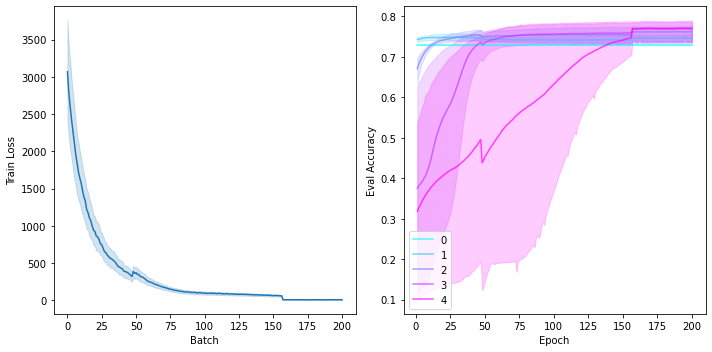

In [9]:
for tfdir in os.listdir(tensorboard_dir):
    if 'hyper' not in tfdir: continue
    print("====================")
    print(tfdir)
    print("====================")
    
    # Collect tensorboard files of interest
    tfdir = tensorboard_dir + tfdir + '/'
    tfdir_files = os.listdir(tfdir)
    if not plot_ci:
        if len(tfdir_files) > 1:
            print('More than one TF file; check it is correct.')
        tfdir_files = [tfdir_files[0]]
        
    # Collect losses
    train_loss = []
    train_batch = []
    eval_loss = []
    eval_epoch = []
    eval_timestep = []
    for tfdir_file in tfdir_files:
        tf_file = tfdir + tfdir_file
        ea = event_accumulator.EventAccumulator(tf_file)
        ea.Reload()
        print(tfdir_file)
        try:
            _train_loss = [e.value for e in ea.Scalars('TrainingLoss/CE')]
        except:
            continue
        _feedforward = [x.value for x in ea.Scalars(f"Hyperparam/pcoder{1}_feedforward")]
        if np.isnan(_feedforward[-1]): continue
        print(_feedforward[-1])
        epoch = 1
        while True:
            try:
                for timestep in range(5):
                    eval_loss.append(ea.Scalars(f'NoisyPerf/Epoch#{epoch}')[timestep].value)
                    eval_epoch.append(epoch)
                    eval_timestep.append(timestep)
                epoch += 1
            except:
                break
        print(epoch)
        divisor = len(_train_loss)/epoch
        train_loss.extend(_train_loss)
        train_batch.extend([b//divisor for b in range(len(_train_loss))])

    # Make pandas dataframe
    train_df = pd.DataFrame({
        'Train Loss': train_loss,
        'Batch': train_batch
        })
    eval_df = pd.DataFrame({
        'Eval Accuracy': eval_loss,
        'Epoch': eval_epoch,
        'Timestep': eval_timestep 
        })
                
    fig, axs = plt.subplots(1, 2, figsize = (10,5))
    sns.lineplot(x='Batch', y='Train Loss', ax=axs[0], data=train_df)
    colors = plt.cm.cool(np.linspace(0,1,5))
    for timestep in range(5):
        sns.lineplot(
            x='Epoch', y='Eval Accuracy',
            ax=axs[1],
            data=eval_df[eval_df['Timestep']==timestep],
            color=colors[timestep], label=timestep,
            alpha=0.7
            )
    plt.tight_layout()
    plt.show()
    print('\n\n')